In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('Lake.png',cv2.IMREAD_COLOR)

In [4]:
img.shape

(494, 480, 3)

In [5]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
cv2.imshow("image",RGB_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
image_2d = RGB_img.reshape(-1, 3)

In [8]:
image_2d.shape

(237120, 3)

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [11]:
kmeans.fit(image_2d)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [12]:
centriod = kmeans.cluster_centers_

In [13]:
uint8_array = np.clip(centriod, 0, 255).astype(np.uint8)

In [14]:
uint8_array

array([[ 11,  12,  45],
       [ 64,  79,  22],
       [107, 103,  56]], dtype=uint8)

In [15]:
labels = kmeans.labels_ 

In [16]:
segmented_image = centriod[labels]
segmented_image = segmented_image.reshape(RGB_img.shape)

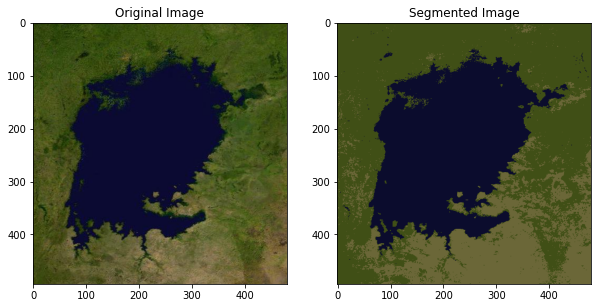

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')

plt.show()

In [18]:
cluster_counts = np.bincount(labels, minlength=kmeans.n_clusters)

In [19]:
pixels_no = []
for cluster_idx, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_idx}: {count} pixels")
    pixels_no.append(cluster_counts)

Cluster 0: 77285 pixels
Cluster 1: 111054 pixels
Cluster 2: 48781 pixels


In [20]:
pixels_no = pixels_no[0]

In [21]:
pixels_no

array([ 77285, 111054,  48781], dtype=int64)

In [22]:
from matplotlib.colors import rgb_to_hsv, to_hex

In [23]:
# Convert RGB to normalized values in the range [0, 1]
normalized_rgb = uint8_array / 255.0


Text(0.5, 1.0, 'Pie Chart')

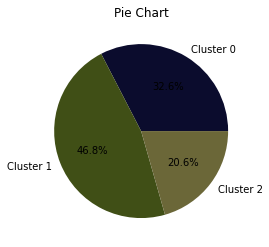

In [24]:
plt.pie(pixels_no, labels = [f"Cluster {i}" for i in range(len(pixels_no))],colors = normalized_rgb,autopct='%1.1f%%')
plt.title("Pie Chart")

In [25]:
data={"R": uint8_array[0], "G": uint8_array[1],"B": uint8_array[2], "Count":pixels_no}

In [26]:
df = pd.DataFrame(data)

In [27]:
df

,R,G,B,Count
0,11,64,107,77285
1,12,79,103,111054
2,45,22,56,48781


In [28]:
lake_pixel = df.iloc[1,3] 

In [29]:
area_of_pixel = 200000/pixels_no.sum()

In [30]:
lake_area = area_of_pixel*lake_pixel

In [31]:
lake_area

93669.02834008097

In [32]:
from scipy.spatial.distance import cdist

In [33]:
wcss = []

# distortions = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, max_iter=20, n_init=10, random_state=42)
    kmeans.fit(image_2d)
    wcss.append(kmeans.inertia_)
    # distortions.append(sum(np.min(cdist(image_2d, kmeans.cluster_centers_,
    #                                     'euclidean'), axis=1)) /  image_2d.shape[0])

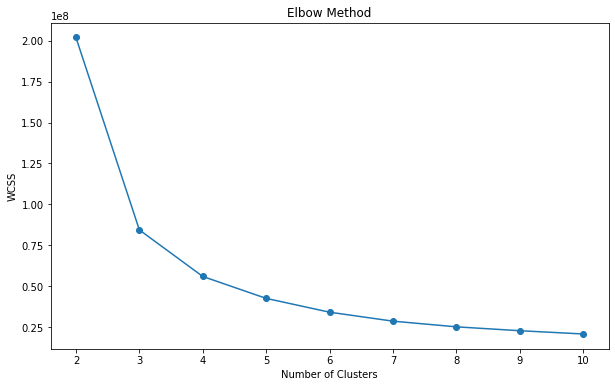

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.show()

In [44]:
kmeans1 = KMeans(n_clusters=4,random_state=42)

In [45]:
kmeans1.fit(image_2d)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [46]:
centroid2 = kmeans1.cluster_centers_

In [47]:
norm_centroid = np.clip(centroid2, 0, 255).astype(np.uint8)

In [48]:
norm_centroid

array([[ 82,  90,  35],
       [ 11,  12,  46],
       [ 56,  74,  17],
       [117, 109,  65]], dtype=uint8)

In [49]:
labels1 = kmeans1.labels_ 

In [50]:
segmented_image = norm_centroid[labels1]
segmented_image = segmented_image.reshape(RGB_img.shape)

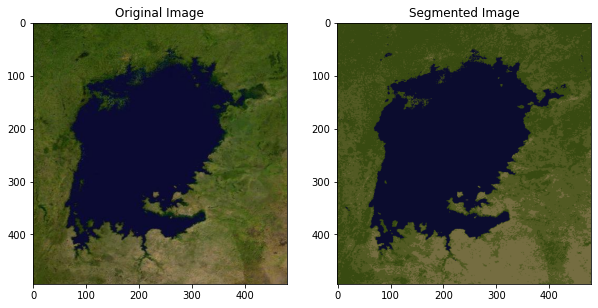

In [51]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(RGB_img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')

plt.show()

In [52]:
cluster_counts2 = np.bincount(labels1, minlength=kmeans1.n_clusters)

In [53]:
pixels_no_2 = []
for cluster_idx, count in enumerate(cluster_counts2):
    print(f"Cluster {cluster_idx}: {count} pixels")
    pixels_no_2.append(cluster_counts2)

Cluster 0: 62566 pixels
Cluster 1: 76119 pixels
Cluster 2: 70087 pixels
Cluster 3: 28348 pixels


In [54]:
pixels_no_2 = pixels_no_2[0]

In [55]:
pixels_no_2

array([62566, 76119, 70087, 28348], dtype=int64)

In [56]:
normalized_rgb2 = norm_centroid / 255.0

Text(0.5, 1.0, 'Pie Chart')

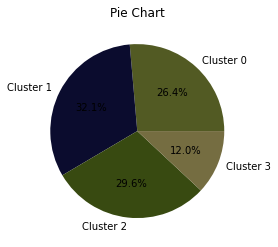

In [57]:
plt.pie(pixels_no_2, labels = [f"Cluster {i}" for i in range(len(pixels_no_2))],colors = normalized_rgb2,autopct='%1.1f%%')
plt.title("Pie Chart")

In [58]:
data={"R": norm_centroid[:,0], "G": norm_centroid[:,1],"B": norm_centroid[:,2], "Count":pixels_no_2}

In [59]:
data

{'R': array([ 82,  11,  56, 117], dtype=uint8),
 'G': array([ 90,  12,  74, 109], dtype=uint8),
 'B': array([35, 46, 17, 65], dtype=uint8),
 'Count': array([62566, 76119, 70087, 28348], dtype=int64)}

In [60]:
df2 = pd.DataFrame(data)

In [61]:
df2

,R,G,B,Count
0,82,90,35,62566
1,11,12,46,76119
2,56,74,17,70087
3,117,109,65,28348


In [62]:
lake_pixel2 = df2.iloc[1,3] 

In [63]:
lake_pixel2

76119

In [64]:
new_area = area_of_pixel*lake_pixel2

In [65]:
new_area

64202.935222672066

In [66]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [70]:
len_n_clusters = [2,3,4]

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.689499189016036


c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.6461509755823546


KeyboardInterrupt: 

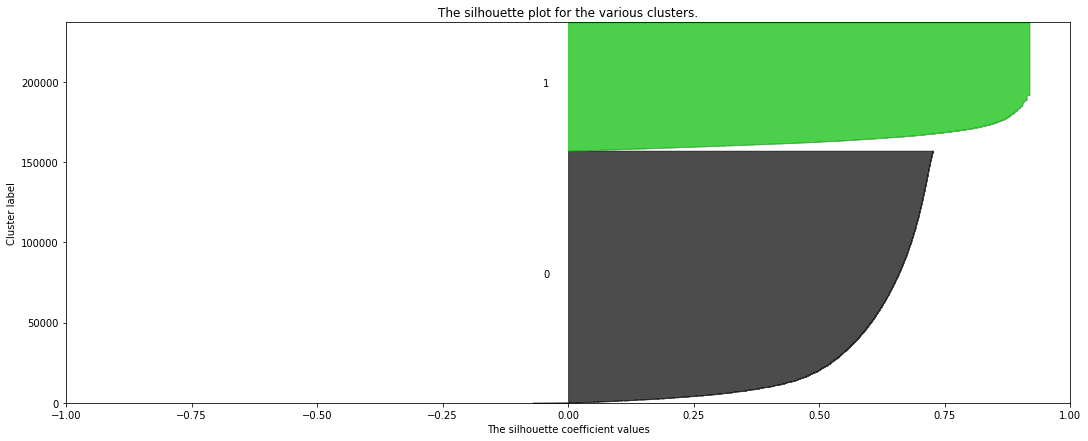

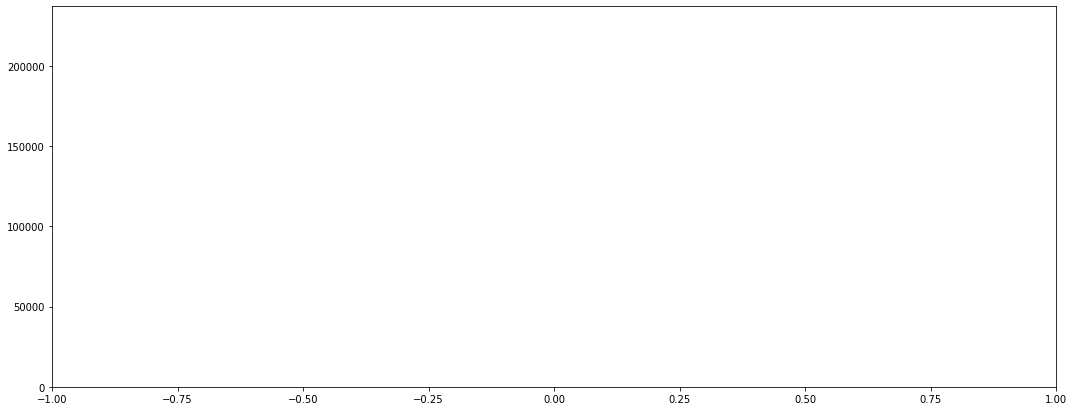

In [71]:
for n_clusters in len_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(image_2d) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(image_2d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(image_2d, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(image_2d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # # The vertical line for average silhouette score of all the values
    # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # ax1.set_yticks([])  # Clear the yaxis labels / ticks
    # ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(
    #     image_2d[:, 0], image_2d[:, 1],image_2d[:, 2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    # )

    # # # Labeling the clusters
    # # centers = clusterer.cluster_centers_
    # # # Draw white circles at cluster centers
    # # ax2.scatter(
    # #     centers[:, 0],
    # #     centers[:, 1],
    # #     marker="o",
    # #     c="white",
    # #     alpha=1,
    # #     s=200,
    # #     edgecolor="k",
    # # )

    # # for i, c in enumerate(centers):
    # #     ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    # # ax2.set_title("The visualization of the clustered data.")
    # # ax2.set_xlabel("Feature space for the 1st feature")
    # # ax2.set_ylabel("Feature space for the 2nd feature")

    # # plt.suptitle(
    # #     "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    # #     % n_clusters,
    # #     fontsize=14,
    # #     fontweight="bold",
    # # )